___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___


## Home work 


Створюємо базу даних щодо оренди квартир в місті Київ на підставі інформації з сайту http://realt.ua

In [2]:
import time
import pickle
import requests

from bs4 import BeautifulSoup
import sqlite3

In [5]:
HEADERS = {
             'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:49.0) Gecko/20100101 Firefox/49.0',
             'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
             'Accept-Language': 'en-US,en;q=0.5',
             'Accept-Encoding': 'gzip, deflate',
             'DNT': '1',
             'Connection': 'keep-alive',
             'Upgrade-Insecure-Requests': '1'
         }


In [6]:
def pars1(SITE):
    r = requests.get(SITE, headers = HEADERS) # 
    time.sleep(1)
    soup = BeautifulSoup(r.text, 'lxml')
    
    for el in soup.find_all('tr', class_ = 'light'):
        link = el.find('a').get('href')
        price = el.find_all('td', class_ = 'sml')[5].text
        num_rum = el.find_all('td', class_ = 'sml')[2].text.split('-')[0]
        area = el.find_all('td', class_ = 'sml')[4].text.split('/')[0]
        district = el.find_all('td', class_ = 'sml')[0].text
        num_floor1 = el.find_all('td', class_ = 'sml')[3].text.split(':')[0]
        num_floor2 = el.find_all('td', class_ = 'sml')[3].text.split(': ')[1]
        address = el.find_all('td', class_ = 'sml')[1].text
        BASE.append([link, address, price, district, num_rum, area, num_floor1, num_floor2])
    
    for el in soup.find_all('tr', class_ = 'gray'):
        link = el.find('a').get('href')
        price = el.find_all('td', class_ = 'sml')[5].text
        num_rum = el.find_all('td', class_ = 'sml')[2].text.split('-')[0]
        area = el.find_all('td', class_ = 'sml')[4].text.split('/')[0]
        district = el.find_all('td', class_ = 'sml')[0].text
        num_floor1 = el.find_all('td', class_ = 'sml')[3].text.split(':')[0]
        num_floor2 = el.find_all('td', class_ = 'sml')[3].text.split(': ')[1]
        address = el.find_all('td', class_ = 'sml')[1].text
        BASE.append([link, address, price, district, num_rum, area, num_floor1, num_floor2])
        


In [7]:
BASE = []

for i in range(0, 3500, 50):
    SITE = f'http://realt.ua/Db2/0Sd_Kv.php?cnt_all=3507&idNp=100000&valt=2&TmSdch=9999&showNum=50&vSps=0&sAkc=1&srtby=19&pos={i}'
    pars1(SITE)

In [8]:
len(BASE)

3500

In [9]:
def pars2():
    for k in range(len(BASE)):
        s1 = BASE[k]
        s2 = s1[0]
        r = requests.get(s2)
        time.sleep(1)
        if r.status_code == 200:
            soup = BeautifulSoup(r.text, 'lxml')
            #add_inform = soup.find_all('td', colspan = '2')[2].text
            try:
                add_inform = soup.find_all('td', colspan = '2')[2].text
            except:
                add_inform = 'Нет информации'
            BASE[k].extend([add_inform])

In [10]:
pars2()

In [11]:
with open('BASE.pkl', 'wb') as f:
    pickle.dump(BASE, f)

In [2]:
import pickle
with open('BASE.pkl', 'rb') as f2:
    res = pickle.load(f2)


In [15]:
conn = sqlite3.connect('db_orenda.sqlite3')

curs = conn.cursor()
curs.execute("CREATE TABLE cargo (id_ INT, adress TEXT, price INT, district TEXT, num_rum INT, area INT, num_floor1 INT, num_floor2 INT, add_inform TEXT)")

for i in range(len(BASE)):
    a = res[i]
    id_ = int(i+1)
    adress = a[1]
    price = a[2]
    district = a[3]
    num_rum = a[4]
    area = a[5]
    num_floor1 = a[6]
    num_floor2 = a[7]
    try:
        add_inform = a[8]
    except IndexError:
        add_inform = 'Нет информации'    
    conn = sqlite3.connect('db_orenda.sqlite3')
    curs = conn.cursor()
    s = "INSERT INTO cargo VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)"
    curs.execute(s, (id_, adress, price, district, num_rum, area, num_floor1, num_floor2, add_inform))
    conn.commit()
    conn.close()

In [3]:
import pickle
with open('districts.pickle', 'rb') as f2:
    district_db = pickle.load(f2)
print(district_db)

          total transport infrastructure  rest security   eko
Голосіїв   10.0      10.0           10.0  10.0     10.0  10.0
Оболонь     9.7       9.7            9.9   9.8      9.7   9.6
Мишоловка   9.6       8.0           10.0  10.0     10.0  10.0
Теремки-2   9.0       9.0            9.0   9.0      9.0   9.0
Китаїв      8.7       8.8            6.0   9.3      9.5  10.0
...         ...       ...            ...   ...      ...   ...
Монтажник   1.0       1.0            1.0   1.0      1.0   1.0
Жовтневе    1.0       1.0            1.0   1.0      1.0   1.0
Петрівка    1.0       1.0            1.0   1.0      1.0   1.0
Перемога    1.0       1.0            1.0   1.0      1.0   1.0
Кудрявець   1.0       1.0            1.0   1.0      1.0   1.0

[99 rows x 6 columns]


In [69]:
# district_db.to_csv('districts.csv')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
Orenda = pd.read_csv('orenda-2.csv')
Orenda.head()

,id_,adress,price,district,num_rum,area,num_floor1,num_floor2,add_inform,metro,GK
0,1,"Науки пр-т, 80а/73",422,Голосеевский,1.0,50,8,23,\nДополнительно : \nАренда современной квартир...,3,0
1,2,"Машинобудiвна , 21",422,Соломенский,1.0,46,10,16,\nДополнительно : \nПредлагается в аренду уютн...,3,0
2,3,"Автозаводська , 93",281,Оболонский,1.0,38,3,9,"\nДополнительно : \nОболонский район, Минский...",3,0
3,4,"улица Регенераторная, 4",551,Днепровский,1.0,40,5,9,\nДополнительно : \nАренда прекрасной квартиры...,3,1
4,5,"Володимирська вул., 49а",2000,Шевченковский,3.0,155,8,12,"\nДополнительно : \nВладимирская, 49а. Сдаетс...",2,0


In [5]:
Orenda['district'].unique()

array(['Голосеевский', 'Соломенский', 'Оболонский', 'Днепровский',
       'Шевченковский', 'Подольский', 'Святошинский', 'Дарницкий',
       'Печерский', 'Деснянский'], dtype=object)

In [6]:
district_db = pd.read_csv('districts.csv')

In [7]:
district_db

,district,total,transport,infrastructure,rest,security,eko
0,Оболонский,7.9,8.2,8.5,8.1,7.1,7.6
1,Голосеевский,7.8,8.1,7.7,8.0,7.2,7.8
2,Шевченковский,7.6,8.1,8.1,7.5,7.5,7.0
3,Соломенский,7.5,7.6,7.8,7.5,7.1,7.4
4,Печерский,7.3,8.4,7.8,6.6,7.5,6.1
5,Дарницкий,7.2,7.6,7.9,7.3,7.0,6.0
6,Днепровский,7.0,7.2,7.3,7.3,6.6,6.8
7,Подольский,6.9,7.2,7.1,6.9,6.7,6.6
8,Святошинский,6.8,7.2,7.2,6.9,6.1,6.7
9,Деснянский,6.2,5.5,6.8,6.6,5.4,6.7


In [8]:
Orenda['price_grn'] = Orenda['price'] * 27.5

In [9]:
Orenda = pd.merge(Orenda, district_db, on=["district"])

In [80]:
#Orenda.set_index('district').join(district_db.set_index('district'))

In [10]:
Orenda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 0 to 3499
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_             3500 non-null   int64  
 1   adress          3500 non-null   object 
 2   price           3500 non-null   int64  
 3   district        3500 non-null   object 
 4   num_rum         3500 non-null   float64
 5   area            3500 non-null   int64  
 6   num_floor1      3500 non-null   int64  
 7   num_floor2      3500 non-null   int64  
 8   add_inform      2505 non-null   object 
 9   metro           3500 non-null   int64  
 10  GK              3500 non-null   int64  
 11  price_grn       3500 non-null   float64
 12  total           3500 non-null   float64
 13  transport       3500 non-null   float64
 14  infrastructure  3500 non-null   float64
 15  rest            3500 non-null   float64
 16  security        3500 non-null   float64
 17  eko             3500 non-null   f

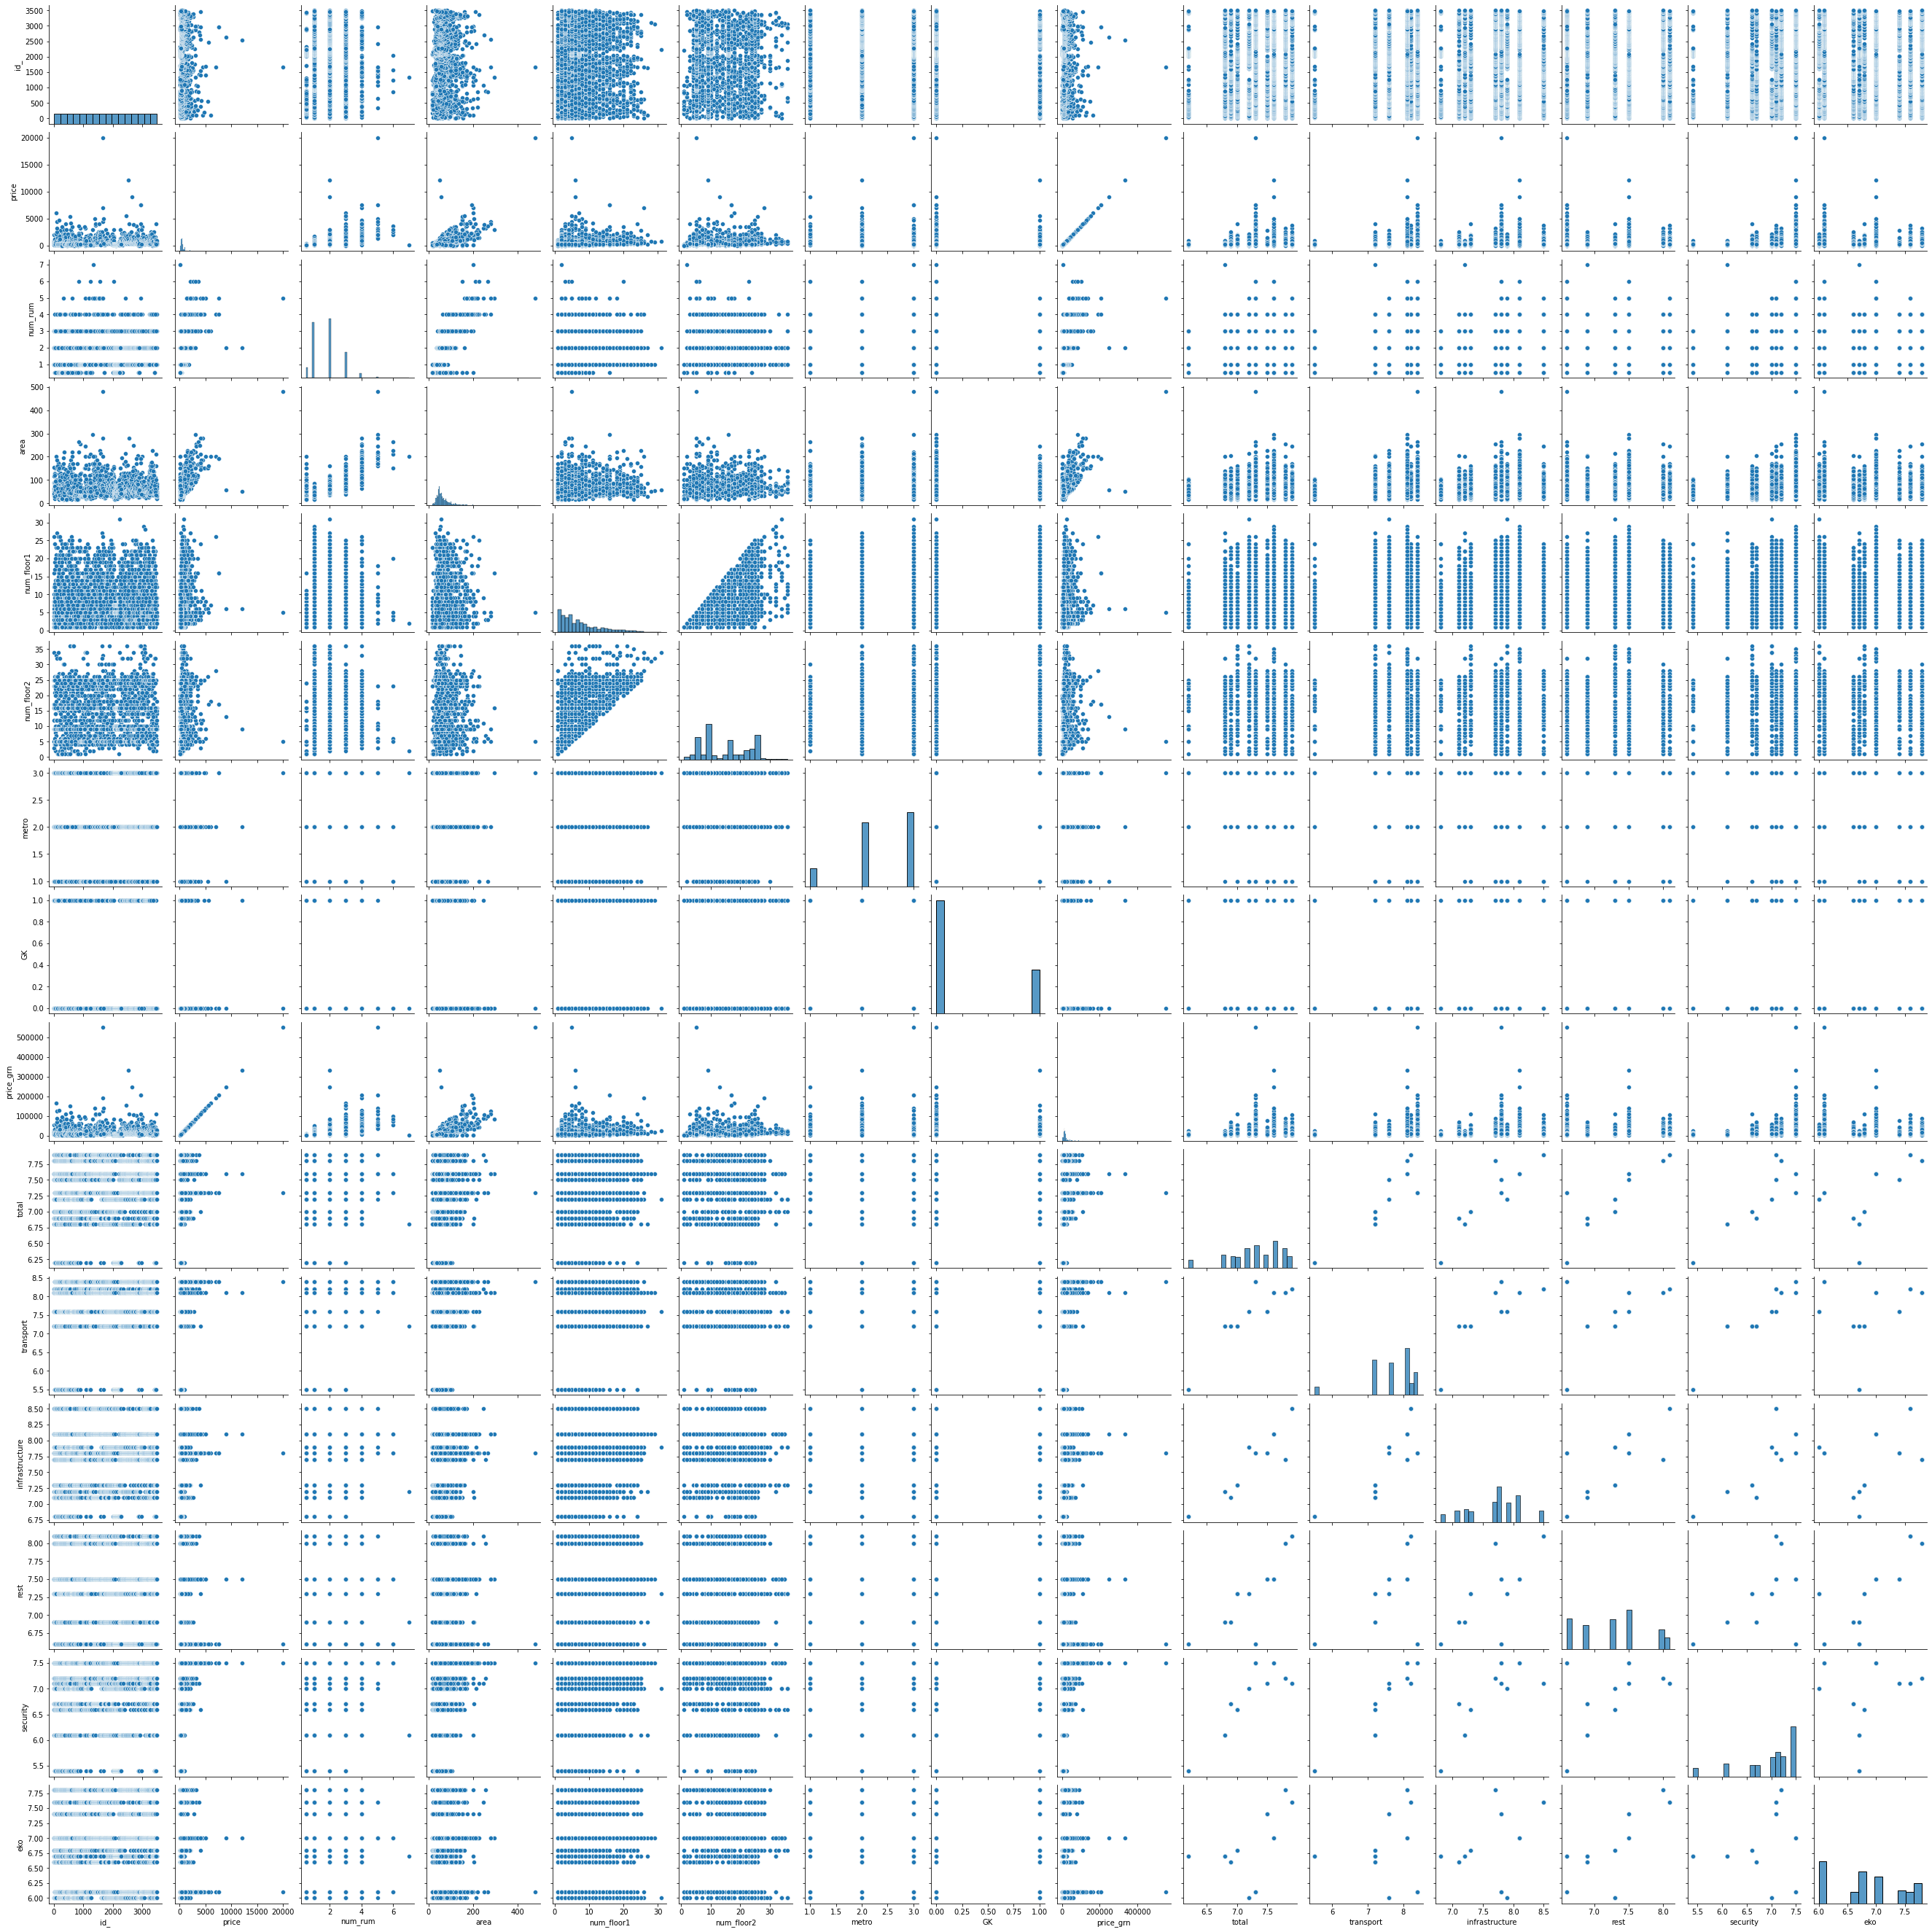

In [12]:
sns.pairplot(Orenda)

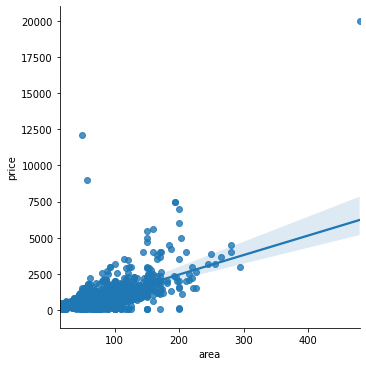

In [15]:
sns.lmplot(x='area',y='price',data=Orenda)

/home/tankist/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

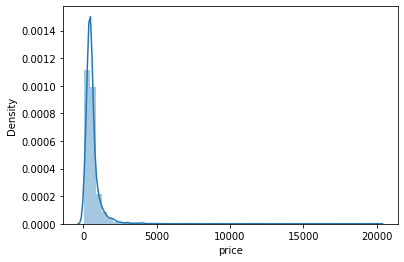

In [16]:
sns.distplot(Orenda['price'])

In [12]:
Orenda.describe()

,id_,price,num_rum,area,num_floor1,num_floor2,metro,GK,price_grn,total,transport,infrastructure,rest,security,eko
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1750.500000,610.024000,1.796143,63.437429,7.828571,14.847143,2.355143,0.280571,16775.660000,7.316571,7.712543,7.716629,7.300514,6.993743,6.842943
std,1010.507298,680.858731,0.905241,32.025610,5.707131,7.920100,0.681180,0.449343,18723.615091,0.423029,0.665883,0.426639,0.491552,0.548075,0.603499
min,1.000000,42.000000,0.500000,15.000000,1.000000,1.000000,1.000000,0.000000,1155.000000,6.200000,5.500000,6.800000,6.600000,5.400000,6.000000
25%,875.750000,352.000000,1.000000,45.000000,3.000000,9.000000,2.000000,0.000000,9680.000000,7.000000,7.200000,7.300000,6.900000,6.700000,6.100000
50%,1750.500000,475.000000,2.000000,55.000000,6.000000,15.000000,2.000000,0.000000,13062.500000,7.300000,8.100000,7.800000,7.300000,7.100000,6.800000
75%,2625.250000,650.250000,2.000000,75.000000,11.000000,23.000000,3.000000,1.000000,17881.875000,7.600000,8.100000,7.900000,7.500000,7.500000,7.400000
max,3500.000000,20000.000000,7.000000,480.000000,31.000000,36.000000,3.000000,1.000000,550000.000000,7.900000,8.400000,8.500000,8.100000,7.500000,7.800000


In [13]:
X = Orenda[['area', 'num_rum', 'num_floor1', 'metro', 'GK', 'transport', 'infrastructure', 'rest', 'security', 'eko']]
y = Orenda['price_grn']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

In [35]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(normalize=True)
lm.fit(X_train,y_train)

LinearRegression(normalize=True)

In [36]:
lm.coef_

array([  356.78166097,  -336.18116046,    56.23629749, -1327.88789337,
        3292.98965547,  2026.7455655 ,    50.18040498, -8778.3559363 ,
        4940.50374912,  3626.85143762])

In [37]:
lm.intercept_

-14816.436107845064

In [38]:
lm.score(X_train,y_train)

0.447668966606491

In [39]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
area,356.781661
num_rum,-336.181160
num_floor1,56.236297
metro,-1327.887893
GK,3292.989655
transport,2026.745566
infrastructure,50.180405
rest,-8778.355936
security,4940.503749
eko,3626.851438


In [40]:
lm.score(X_test,y_test)

0.5376613133418722

In [41]:
y_pred = lm.predict(X_test)

In [42]:
y_pred

array([17274.48389189,  7265.12677741,   292.39335963, 13744.87922531,
       14936.77290276, 11484.68582231, 18935.77771228, 21788.17566945,
        5968.56772284, 10838.441759  , 24866.19140122, 36828.27214849,
       41886.59385375,  9575.03030985, 16907.5177187 , 25995.19618426,
       10859.78478277, 21425.03947521, -1124.37494347,  9049.03508223,
       20155.47860032, 19266.54965675, 18827.59070695, 13990.71622298,
        8702.98175957, 12612.4592206 , 17030.97541095, 11042.78644846,
       94734.04274411,  6068.73119782, 36896.76850902, 11432.38841199,
       14225.62370104, 16690.1165134 , 25599.10726433, 24208.85304195,
        7363.24652353, 20605.36898025, 21650.78525022, 21288.74830808,
       18177.13210505, 22824.95335285,  3341.65149321, 21647.27398756,
       14735.34933373, 44090.85511798,  1781.77502047, 18100.00399984,
       16572.12588749, 28761.46541824, 13930.87408119, 12170.11700855,
       31904.898509  , 28175.44164283,  4389.00410748, -1325.83809136,
      

In [45]:
pd.DataFrame({
    'y_true': y_test,
    'y_pred': y_pred,
    'z': y_pred - y_test
}).reset_index(drop=True)

,y_true,y_pred,z
0,20790.0,17274.483892,-3515.516108
1,11605.0,7265.126777,-4339.873223
2,7260.0,292.393360,-6967.606640
3,14520.0,13744.879225,-775.120775
4,44000.0,14936.772903,-29063.227097
...,...,...,...
345,21972.5,16866.541219,-5105.958781
346,12100.0,8913.469353,-3186.530647
347,11605.0,11618.951036,13.951036
348,9680.0,7910.514679,-1769.485321


In [24]:
with open('Orenda_lm.pkl', 'wb') as f:
    pickle.dump(lm, f)

In [25]:
with open('Orenda_lm.pkl', 'rb') as f2:
    lm2 = pickle.load(f2)

In [26]:
lm2.predict(X_test)

array([ 1.65828581e+04,  7.07534762e+03,  1.01710310e+02,  1.40376498e+04,
        1.54298780e+04,  1.12214994e+04,  1.81753495e+04,  2.12705842e+04,
        5.96866285e+03,  1.05183498e+04,  2.39426405e+04,  3.65641561e+04,
        4.27249650e+04,  9.70405749e+03,  1.65497477e+04,  2.60928718e+04,
        1.01947122e+04,  2.15688642e+04, -1.55453741e+03,  8.99114210e+03,
        2.04008877e+04,  1.96012233e+04,  1.91932532e+04,  1.35546396e+04,
        9.06826622e+03,  1.22425636e+04,  1.63201322e+04,  1.11259863e+04,
        9.92911097e+04,  5.80067894e+03,  3.70493390e+04,  1.19524700e+04,
        1.52406300e+04,  1.61899208e+04,  2.53929953e+04,  2.39117314e+04,
        7.43928156e+03,  2.08974941e+04,  2.18134487e+04,  2.19059346e+04,
        1.80690624e+04,  2.17490288e+04,  2.81911018e+03,  2.19176668e+04,
        1.48728295e+04,  4.61662711e+04,  1.56651215e+03,  1.87383000e+04,
        1.62658923e+04,  2.89666341e+04,  1.36310747e+04,  1.26065746e+04,
        3.27839408e+04,  

In [ ]:
#X = Orenda[['area', 'num_rum', 'num_floor1', 'metro', 'GK', 'transport', 'infrastructure', 'rest', 'security', 'eko']]

In [51]:
x = lm.predict(np.array([60, 2, 19, 2, 0, 8.2, 8.5, 8.1, 7.1, 7.6]).reshape((1,-1)))
x

array([12913.62663475])